In [1]:
import numpy as np

#### Loading evaluation data

In [2]:
# eval_data_path = '../logs/evaluation/LoadModelTest-2022.08.12-16-07-13/trajs.npy'
# eval_data_path = '../logs/evaluation/LoadProvidedDataset_LoadCreatedModel-2022.08.16-11-29-03/trajs.npy'

# Uniform Cubes below
# eval_data_path = '../logs/evaluation/UniformBoxData_GeneratedModel-2022.08.16-23-40-58/trajs.npy'

# Long Boxes
# eval_data_path = '../logs/evaluation/LongBoxes_GeneratedModel-2022.08.17-00-00-53/trajs.npy'

# Flat Boxes
eval_data_path = '../logs/evaluation/FlatBoxes_GeneratedModel-2022.08.17-00-06-47/trajs.npy'

In [3]:
eval_data_full = np.load(eval_data_path, allow_pickle=True)

In [4]:
eval_data = eval_data_full[-1] # Last packing set

Need to get data from `[1, 2, 3, 4, 5, 6, 7]` to `[1, 2, 3]`, `[4, 5, 6]` and `[7]` (I think `7` is the density, so can be dropped).

In [5]:
# For each entry
x = [1, 2, 3, 4, 5, 6, 7]
y = x[:3]
z = x[-4:-1]
d = x[-1]

In [6]:
eval_data[0]

[2, 10, 10, 8, 0, 0, 0]

#### Extracting position and box size from output data.

In [7]:
position = []
opp_corner = []
box_size = []
den = []
for i in range(len(eval_data)):
    box_size.append((eval_data[i][0],
                     eval_data[i][1],
                     eval_data[i][2]))
    position.append((eval_data[i][-4],
                       eval_data[i][-3],
                       eval_data[i][-2]))
    opp_corner.append((eval_data[i][-4] + eval_data[i][0],
                     eval_data[i][-3] + eval_data[i][1],
                     eval_data[i][-2] + eval_data[i][2]))
    den.append((eval_data[i][-1]))


#### Checking data type and formatting

In [8]:
print(type(position))
print(type(opp_corner))
print(type(box_size))
print(type(den))

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>


In [9]:
print(type(position[0]))
print(type(opp_corner[0]))
print(type(box_size[0]))
print(type(den[0]))

<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'int'>


In [10]:
print((eval_data[0]))
print((position[0]))
print((opp_corner[0]))
print((box_size[0]))
print()
print((eval_data[1]))
print((position[1]))
print((opp_corner[1]))
print((box_size[1]))
print()
print(position)
print()
print(box_size)

[2, 10, 10, 8, 0, 0, 0]
(8, 0, 0)
(10, 10, 10)
(2, 10, 10)

[2, 6, 9, 6, 0, 0, 0]
(6, 0, 0)
(8, 6, 9)
(2, 6, 9)

[(8, 0, 0), (6, 0, 0), (0, 0, 0), (4, 1, 0), (0, 1, 0)]

[(2, 10, 10), (2, 6, 9), (6, 1, 7), (2, 7, 9), (2, 6, 7)]


### Rendering packed bin with code from [Plotting Cuboids in matplotlib](https://stackoverflow.com/questions/49277753/python-matplotlib-plotting-cuboids)

In [11]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
%matplotlib notebook

In [12]:
def cuboid_data2(o, size=(1,1,1)):
    X = [[[0, 1, 0], [0, 0, 0], [1, 0, 0], [1, 1, 0]],
         [[0, 0, 0], [0, 0, 1], [1, 0, 1], [1, 0, 0]],
         [[1, 0, 1], [1, 0, 0], [1, 1, 0], [1, 1, 1]],
         [[0, 0, 1], [0, 0, 0], [0, 1, 0], [0, 1, 1]],
         [[0, 1, 0], [0, 1, 1], [1, 1, 1], [1, 1, 0]],
         [[0, 1, 1], [0, 0, 1], [1, 0, 1], [1, 1, 1]]]
    X = np.array(X).astype(float)
    for i in range(3):
        X[:,:,i] *= size[i]
    X += np.array(o)
    return X

def plotCubeAt2(positions,sizes=None,colors=None, **kwargs):
    if not isinstance(colors,(list,np.ndarray)): colors=["C0"]*len(positions)
    if not isinstance(sizes,(list,np.ndarray)): sizes=[(1,1,1)]*len(positions)
    g = []
    for p,s,c in zip(positions,sizes,colors):
        g.append( cuboid_data2(p, size=s) )
    return Poly3DCollection(np.concatenate(g),  
                            facecolors=np.repeat(colors,6), **kwargs)

[(8, 0, 0), (6, 0, 0), (0, 0, 0), (4, 1, 0), (0, 1, 0)]
[(2, 10, 10), (2, 6, 9), (6, 1, 7), (2, 7, 9), (2, 6, 7)]


<IPython.core.display.Javascript object>


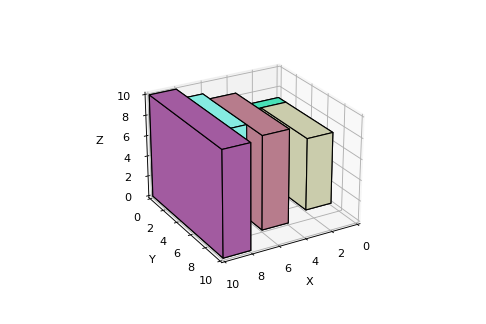

/home/cim/anaconda3/envs/packing_env/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  del sys.path[0]


In [13]:
positions = position
sizes = box_size
print(positions)
print(sizes)
# color code from https://datascientyst.com/get-list-of-n-different-colors-names-python-pandas/
color = []
n = len(positions)
for i in range(n):
    color.append('#%06X' % randint(0, 0xFFFFFF))
colors = color

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_aspect('auto')

pc = plotCubeAt2(positions,sizes,colors=colors, edgecolor="k")
ax.add_collection3d(pc)    

ax.set_xlim([0,10])
ax.set_ylim([0,10])
ax.set_zlim([0,10])

ax.set_xlabel('X ')
ax.set_ylabel('Y ')
ax.set_zlabel('Z ')

plt.show()